# Исследование данных о продажах компьютерных игр интернет-магазина "Стримчик"
В нашем распоряжении данные за 2016 год о продажах компьютерных игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо проанализировать данные и проверить гипотезы для выявления определяющих успешность игры закономерностей, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

__Описание данных__
* `Name` — название игры;
* `Platform` — платформа;
* `Year_of_Release` — год выпуска;
* `Genre` — жанр игры;
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий);
* `EU_sales` — продажи в Европе (миллионы проданных копий);
* `JP_sales` — продажи в Японии (миллионы проданных копий);
* `Other_sales` — продажи в других странах (миллионы проданных копий);
* `Critic_Score` — оценка критиков (максимум 100);
* `User_Score` — оценка пользователей (максимум 10);
* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [1]:
#импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

### Загрузка данных

In [2]:
#считаем CSV-файлы с данными и сохраним в датафрейм
games = pd.read_csv('/datasets/games.csv')

In [3]:
#выведем первые строки и общую информацию 
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


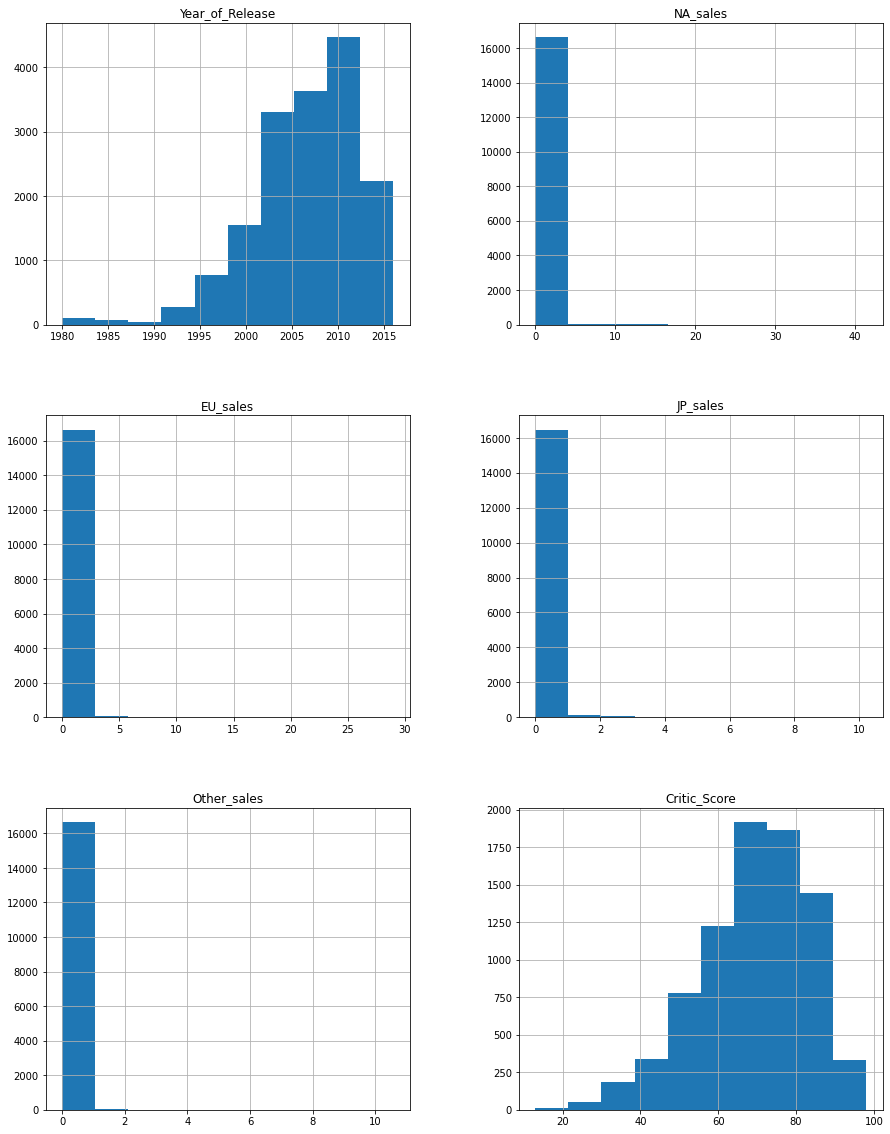

In [5]:
games.hist(figsize=(15, 20))
plt.show()

__Вывод__

Данные в датасете соответствуют описанию. Названия столбцов написаны с использованием разных региcтров, в данных имеются пропуски, для некоторых столбцов указаны некорректные типы данных - `Year_of_Release` и `User_Score`.

### Подготовка данных

In [6]:
#приведем названия столбцов к единому регистру
games.columns = games.columns.str.lower()
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [7]:
#посмотрим содержание столбцов с пропусками
display(games['year_of_release'].unique())
display(games['genre'].unique())
display(games['critic_score'].unique())
display(games['user_score'].unique())
display(games['rating'].unique())

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Название игры и ее жанр являются одними из ключевых параметров, заменить их на какое-либо значение не представляется возможным. 
Аналогичная ситуация с годом выхода, для дальнейшего проведения анализа необходимы конкретные данные по игре.\
Предлагается удалить строки с пропусками в данных столбцах.

In [8]:
games = games.dropna(subset=['name', 'year_of_release', 'genre']).reset_index(drop=True)
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [9]:
#приведем тип данных в столбце 'year_of_release' к целочисленным значениям
games['year_of_release'] = games['year_of_release'].astype(int)

In [10]:
#значение tbd в столбце 'user_score' аналогично отсутствию рейтинга, поэтому заменим его значением NaN
games.loc[games['user_score'] == 'tbd', 'user_score'] = np.NaN

In [11]:
#значение рейтинга K-A(Kids to Adults) переименовано в E(Everyone), поэтому заменим его в столбце 'rating'
games.loc[games['rating'] == 'K-A', 'rating'] = 'E'

Оценки критиков и пользователей являются субъективными параметрами, зависящими от критериев оценки и личных предпочтений пользователей. Пропуски в столбцах `critic score` и `user_score` предлагается не заполнять.

In [14]:
#приведем тип данных в столбце 'user_score' к вещественным числам
games['user_score'] = games['user_score'].astype(float)

In [15]:
#пропуски в столбце 'rating' заполним значением unknown
games['rating'] = games['rating'].fillna('unknown')

In [16]:
#проверим датафрейм на наличие строк-дубликатов
games.duplicated().sum()

0

In [17]:
#проверим данные на неявные дубликаты
games.loc[:, 'name': 'genre'].duplicated().sum()

1

In [18]:
games.loc[games.duplicated(subset=['name', 'platform', 'year_of_release', 'genre'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15969,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.0,0.0,83.0,5.5,E


In [19]:
games.loc[(games['name'] == 'Madden NFL 13') & (games['platform'] == 'PS3')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
600,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
15969,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


In [20]:
#удалим строку с неявными дубликатами, в которой меньше заполненных данных
games = games.drop_duplicates(subset=['name', 'platform', 'year_of_release', 'genre'])\
.reset_index(drop=True)

In [21]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [22]:
games.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16443.000000,16443.000000,16443.000000,16443.000000,16443.000000,7982.000000,7462.000000
mean,2006.485921,0.264028,0.145939,0.078492,0.047597,68.992608,7.126548
std,5.875546,0.818400,0.506731,0.311109,0.188011,13.920049,1.499429
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


In [23]:
#добавим столбец 'total_sales_game' с суммарными продажами по каждой игре
games['total_sales_game'] = games[['na_sales','eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales_game
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


__Вывод__

В процессе предобработки проведены следующие действия с данными:
1. Названия столбцов приведены к единому регистру.
2. Преобразованы типы данных в столбцах `year_of_release` и `user_score` на int и float соответственно.

Год выхода игры - целочисленное значение, поэтому замена на тип int. Пользовательский рейтинг - это дробные числа, поэтому замена на float, чтобы в дальнейшем иметь возможность обработать пропуски и проводить математические операции с данными.

3. Обработаны пропуски и неявные дубликаты:
* название игры и ее жанр являются одними из ключевых параметров продукта, заменить их на какое-либо значение не представляется возможным. Аналогичная ситуация с годом выхода, для дальнейшего проведения анализа необходимы конкретные данные по игре. Предложено удалить строки с пропусками в данных столбцах (удалено менее 2% от первоначального объема данных).
* значение 'tbd' в столбце `user_score` аналогично отсутствию рейтинга (присвоение рейтинга только планируется), заменено значением NaN.
* пропуски в столбцах `critic_score` и `user_score` оставляем, так как оценки критиков и пользователей являются субъективными параметрами, зависящими от критериев оценки и личных предпочтений пользователей. Замена может исказить данные и дальнейший анализ.
* рейтинг K-A(Kids to Adults) переименован ассоциацией ESRB в E(Everyone), поэтому проведена замена в столбце `rating` к единому значению, пропуски в столбце `rating` заполнены значением unknown.

Появление пропусков в данных может быть обусловлено человеческим фактором, когда данные были упущены и не введены в систему, а также отсутствием их на момент сбора информации (не определен жанр игры и дата выхода, не присвоены рейтинги и не получены отзывы) и несвоевременной актуализацией в дальнейшем.

4. Проведена проверка на наличие аномальных значений и дубликатов.
Исходя из числового описания данных можно сделать вывод об отсутствии выбивающихся значений в датасете. Строки-дубликаты в данных также отсутствуют. Неявные дубликаты с одинаковыми названиями, годами выпуска, платформой и жанром удалены.
5. Добавлен столбец `total_sales_game`, в котором посчитаны суммарные продажи во всех регионах по каждой игре.

### Проведение анализа данных

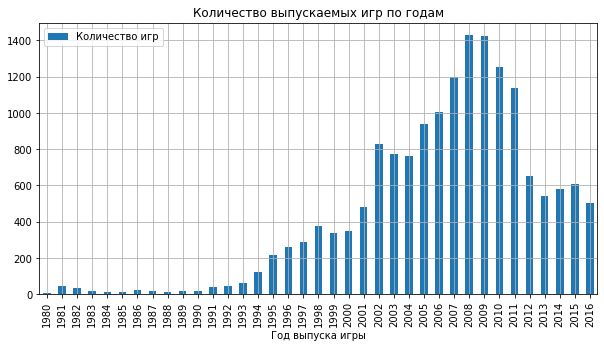

In [24]:
#посмотрим, какое количество игр выпускалось в разные годы
(
    games.pivot_table(index='year_of_release', values='name', aggfunc='count')
    .plot(kind='bar', y=('name'), title='Количество выпускаемых игр по годам', 
          label='Количество игр', figsize=(10, 5), grid=True)
)
plt.xlabel('Год выпуска игры')
plt.show()

На графике видно, что в датасете представлены данные с 1980 года. В период 1980-1995 годы игр выпускалось значительно меньше. Пик по выпуску игр приходится на 2008-2009 годы. Последние годы наблюдается спад.

In [25]:
#посмотрим, как менялись продажи по платформам с 2008 года
games = games.query('year_of_release >= 2008')

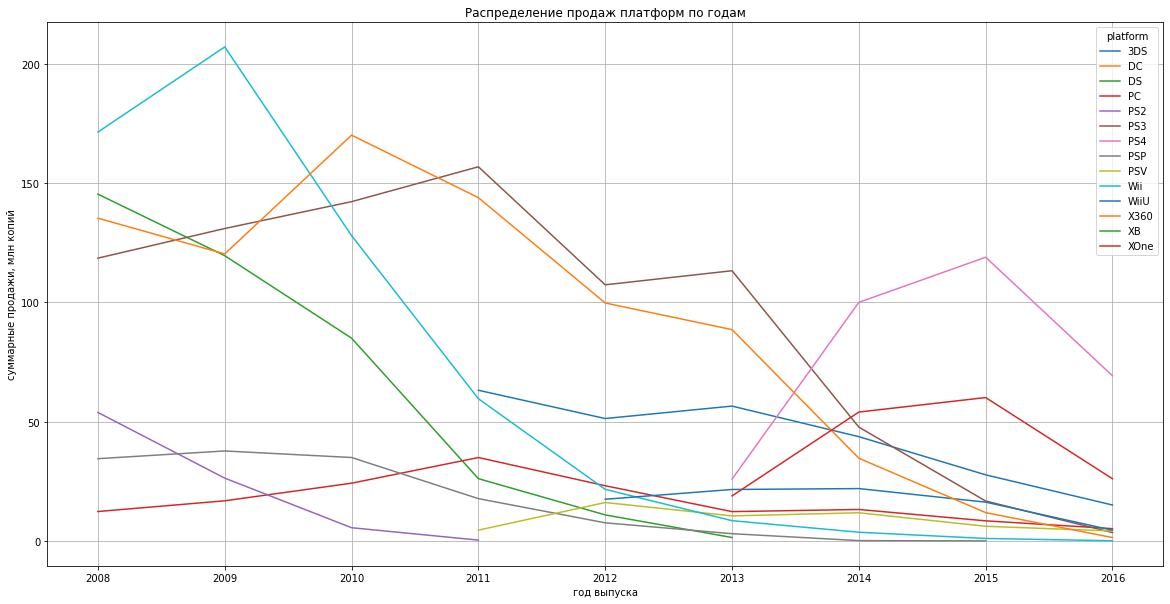

In [26]:
(
    games.pivot_table(index='year_of_release', columns='platform', values='total_sales_game', aggfunc='sum')
    .plot(title='Распределение продаж платформ по годам', grid=True, figsize=(20, 10))
)
plt.ylabel('суммарные продажи, млн копий')
plt.xlabel('год выпуска')
plt.show()

В период 2011-2013 годы новые платформы появлялись ежегодно. При выходе новой платформы интерес к предыдущей версии резко снижался. Старые платформы уходят с рынка постепенно. В последние два года продажи по большинству платформ приблизились к 0, за исключением трех - PS4, XOne и 3DS.

Для построения прогноза на 2017 год предлагается использовать данные за 2015-2016 год.

In [27]:
games = games.query('year_of_release >= 2015')

In [28]:
#выведем таблицу с суммарными продажами по 3 лидирующим платформам
top_platform = ['3DS', 'PS4', 'XOne']

In [29]:
(
    games.query('platform in @top_platform')
    .groupby('platform')['total_sales_game']
    .sum()
    .sort_values(ascending=False)
)

platform
PS4     188.15
XOne     86.29
3DS      42.92
Name: total_sales_game, dtype: float64

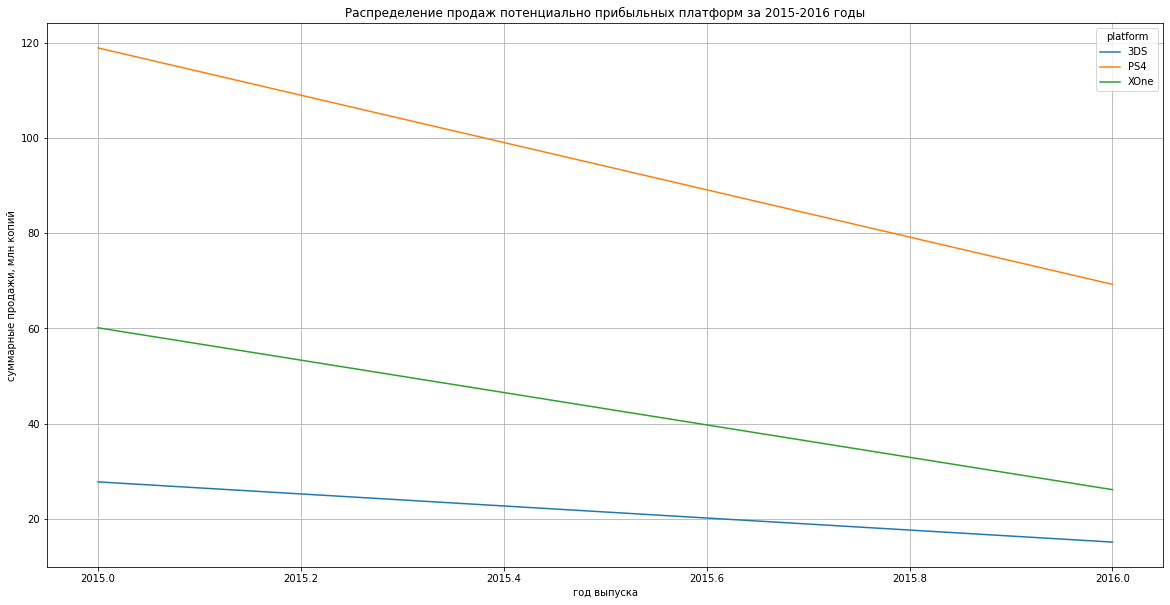

In [30]:
(
    games.query('platform in @top_platform')
    .pivot_table(index='year_of_release', columns='platform', values='total_sales_game', aggfunc='sum')
    .plot(title='Распределение продаж потенциально прибыльных платформ за 2015-2016 годы', grid=True, figsize=(20, 10))
)
plt.ylabel('суммарные продажи, млн копий')
plt.xlabel('год выпуска')
plt.show()

In [31]:
#построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам
(
    games.query('platform in @top_platform')
    .groupby('platform')['total_sales_game']
    .describe()
)

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,132.0,0.325152,0.798620,0.01,0.030,0.09,0.2325,7.14
PS4,301.0,0.625083,1.457063,0.01,0.050,0.12,0.4200,14.63
XOne,167.0,0.516707,0.965940,0.01,0.035,0.13,0.5550,7.39


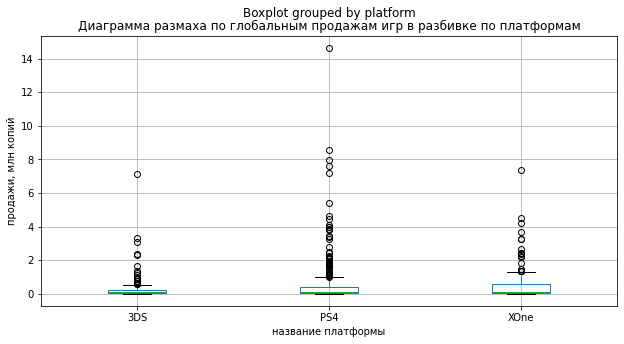

In [32]:
(
    games.query('platform in @top_platform')
    .boxplot(column=['total_sales_game'], by=['platform'], figsize=(10, 5))
)
plt.title('Диаграмма размаха по глобальным продажам игр в разбивке по платформам')
plt.xlabel('название платформы')
plt.ylabel('продажи, млн копий')
plt.show()

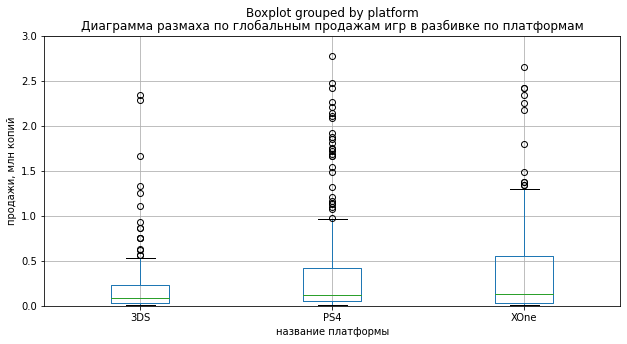

In [33]:
#укрупним диаграмму, обрезав часть выбросов, и сравним статистики платформ
(
    games.query('platform in @top_platform')
    .boxplot(column=['total_sales_game'], by=['platform'], figsize=(10, 5))
)
plt.ylim(0, 3)
plt.title('Диаграмма размаха по глобальным продажам игр в разбивке по платформам')
plt.xlabel('название платформы')
plt.ylabel('продажи, млн копий')
plt.show()

На диаграмме видно, что платформы имеют схожие значения медиан продаж, но в целом, учитывая размер коробки и квартили, показатели продаж по платформе XOne выше.\
При этом по платформе PS4 выбросов значительно больше, чем по другим платформам, что может означать, что на этой платформе чаще "выстреливают" игры, которые продаются более успешно.

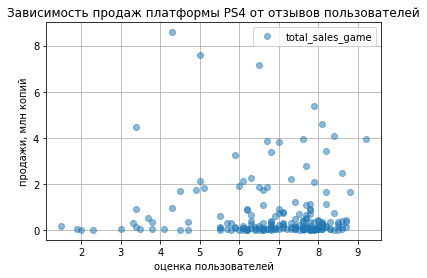

In [34]:
#рассмотрим на примере платформы PS4, как влияют на продажи отзывы пользователей и критиков.
#построим диаграмму рассеяния и посчитаем коэффициент корреляции
games_ps4 = games.loc[games['platform'] == 'PS4']
games_ps4.plot(x='user_score', y='total_sales_game', style='o', alpha=0.5, 
               title='Зависимость продаж платформы PS4 от отзывов пользователей', grid=True) 
plt.xlabel('оценка пользователей')
plt.ylabel('продажи, млн копий')
plt.show()

In [35]:
print('Коэффициент корреляции продаж от отзывов пользователей', 
      round(games_ps4['user_score'].corr(games_ps4['total_sales_game']), 2))

Коэффициент корреляции продаж от отзывов пользователей -0.06


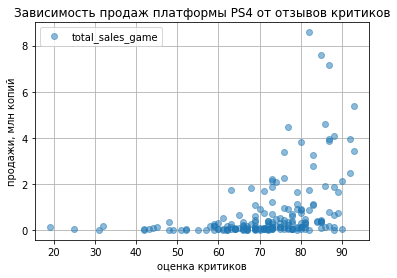

In [36]:
games_ps4.plot(x='critic_score', y='total_sales_game', style='o', alpha=0.5, 
               title='Зависимость продаж платформы PS4 от отзывов критиков', grid=True) 
plt.xlabel('оценка критиков')
plt.ylabel('продажи, млн копий')
plt.show()

In [37]:
print('Коэффициент корреляции продаж от отзывов критиков', 
      round(games_ps4['critic_score'].corr(games_ps4['total_sales_game']), 2))

Коэффициент корреляции продаж от отзывов критиков 0.39


Коэффициент корелляции показывает отсутствие зависимости продаж от отзывов пользователей и слабую зависимость от отзывов критиков, при этом на графиках видно, что преобладают высокие оценки и наблюдается рост продаж при оценках выше среднего.

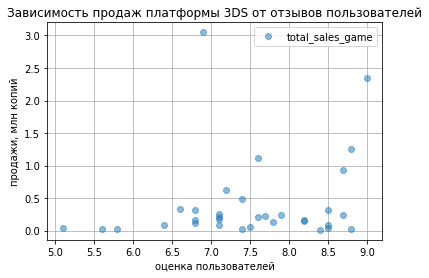

In [38]:
games_3ds = games.loc[games['platform'] == '3DS']
games_3ds.plot(x='user_score', y='total_sales_game', style='o', alpha=0.5, 
               title='Зависимость продаж платформы 3DS от отзывов пользователей', grid=True) 
plt.xlabel('оценка пользователей')
plt.ylabel('продажи, млн копий')
plt.show()

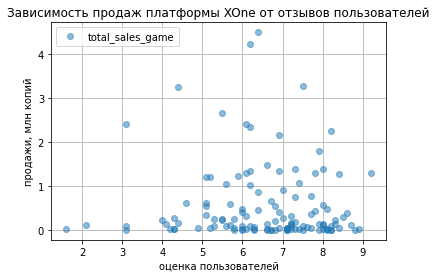

In [39]:
games_xone = games.loc[games['platform'] == 'XOne']
games_xone.plot(x='user_score', y='total_sales_game', style='o', alpha=0.5, 
               title='Зависимость продаж платформы XOne от отзывов пользователей', grid=True) 
plt.xlabel('оценка пользователей')
plt.ylabel('продажи, млн копий')
plt.show()

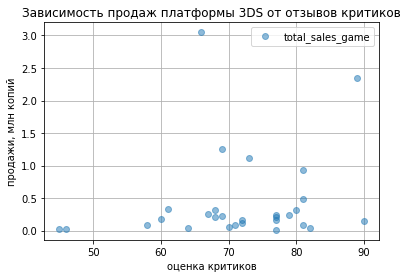

In [40]:
games_3ds.plot(x='critic_score', y='total_sales_game', style='o', alpha=0.5, 
               title='Зависимость продаж платформы 3DS от отзывов критиков', grid=True) 
plt.xlabel('оценка критиков')
plt.ylabel('продажи, млн копий')
plt.show()

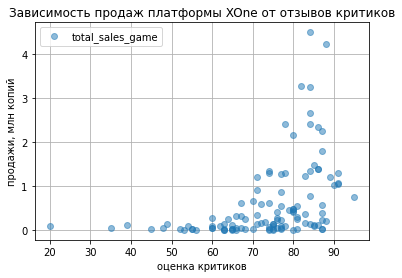

In [41]:
games_xone.plot(x='critic_score', y='total_sales_game', style='o', alpha=0.5, 
               title='Зависимость продаж платформы XOne от отзывов критиков', grid=True) 
plt.xlabel('оценка критиков')
plt.ylabel('продажи, млн копий')
plt.show()

На графиках по платформам 3DS и XOne также видно, что зависимость от оценки пользователей отсутствует. Присутствует слабая зависимость от оценок критиков, при оценках выше среднего наблюдается рост продаж по платформе XOne. Оценки по платформе 3DS слабее по сравнению с другими платформами, что отражается и на продажах.

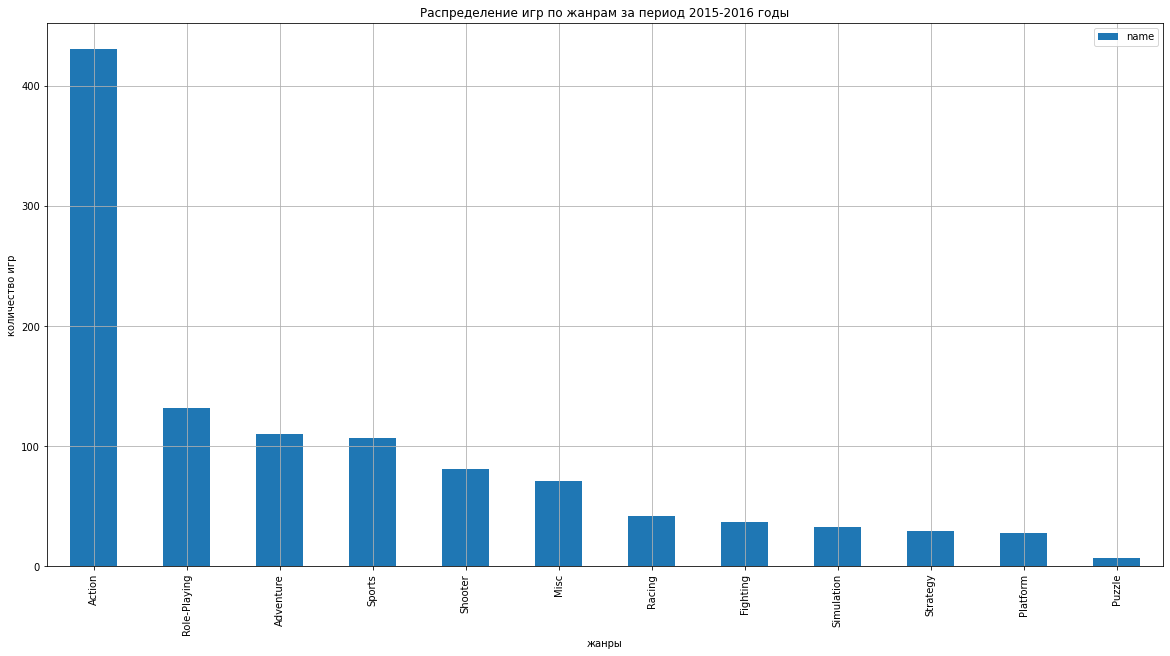

In [42]:
#посмотрим на распределение выпущенных игр по жанрам
(
    games.pivot_table(index='genre', values='name', aggfunc='count')
    .sort_values(('name'), ascending=False)
    .plot(kind='bar', title='Распределение игр по жанрам за период 2015-2016 годы', grid=True, figsize=(20, 10))
)
plt.ylabel('количество игр')
plt.xlabel('жанры')
plt.show()

Жанр Action является явным лидером по количеству выпущенных игр.

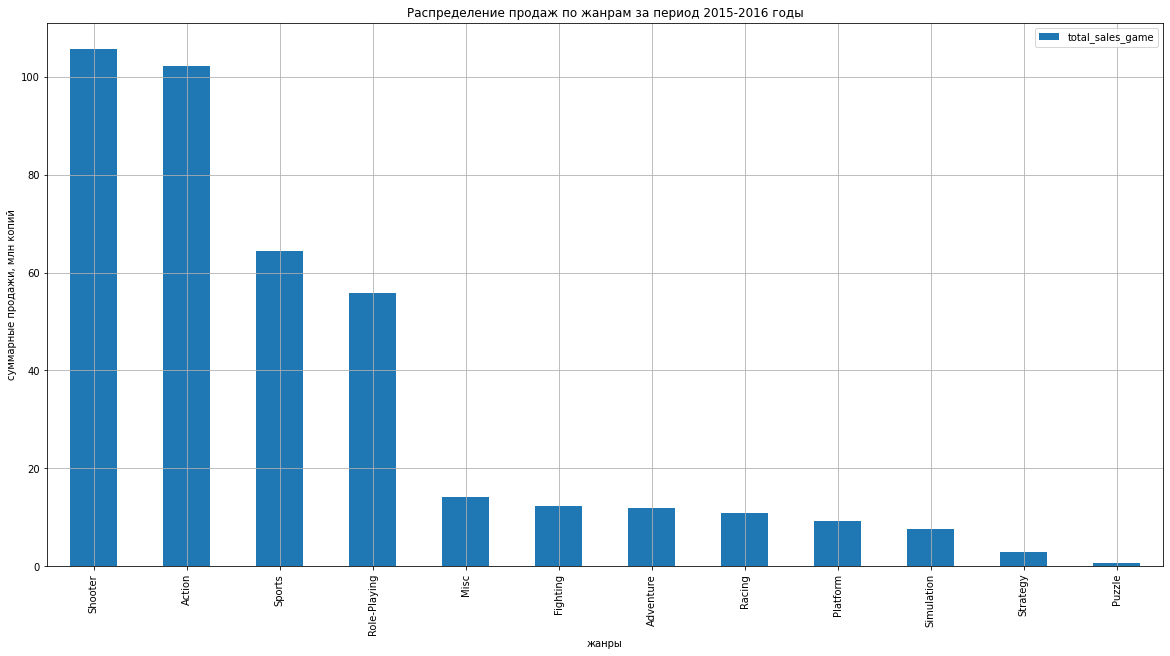

In [43]:
#посмотрим распределение продаж по жанрам
(
    games.pivot_table(index='genre', values='total_sales_game', aggfunc='sum')
    .sort_values(('total_sales_game'), ascending=False)
    .plot(kind='bar', title='Распределение продаж по жанрам за период 2015-2016 годы', grid=True, figsize=(20, 10))
)
plt.ylabel('суммарные продажи, млн копий')
plt.xlabel('жанры')
plt.show()

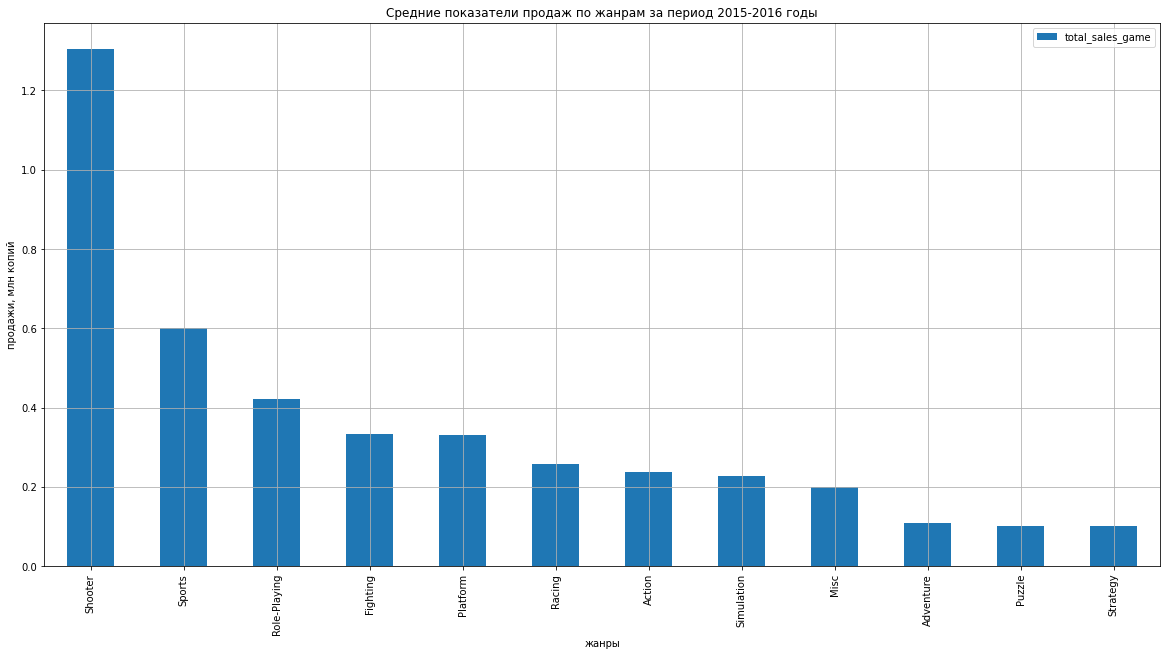

In [44]:
#посмотрим средние показатели продаж по жанрам
(
    games.pivot_table(index='genre', values='total_sales_game')
    .sort_values(('total_sales_game'), ascending=False)
    .plot(kind='bar', title='Средние показатели продаж по жанрам за период 2015-2016 годы', grid=True, figsize=(20, 10))
)
plt.ylabel('продажи, млн копий')
plt.xlabel('жанры')
plt.show()

Несмотря на преобладание игр в жанре Action, самыми продаваемыми являются игры в жанре Shooter. Также в лидерах по продажам с заметным преимуществом относительно других жанров находятся игры в жанрах Action, Sports и Role-Playing, все 4 жанра находятся в топе и по выпуску игр.\
По показателю проданных копий одной игры также лидирует жанр Shooter, при этом жанр Action набирает объем продаж за счет бестселлеров.

__Вывод__

В датасете представлены данные с 1980 года. В период 1980-1995 годы игр выпускалось значительно меньше. Пик по выпуску игр приходится на 2008-2009 годы. Последние годы наблюдается спад.\
В период 2011-2013 годы новые платформы появлялись ежегодно. При выходе новой платформы интерес к предыдущей версии резко снижался. Старые платформы уходят с рынка постепенно. В последние два года продажи по большинству платформ приблизились к 0, за исключением трех - PS4, XOne и 3DS.\
Для дальнейшего анализа были выбраны данные за период 2015-2016 и по наиболее перспективным платформам - PS4, XOne и 3DS:
* на графике «ящик с усами» по глобальным продажам игр в разбивке по платформам видно, что платформы имеют схожие значения медиан продаж, но в целом, учитывая размер коробки и квартили, показатели продаж по платформе XOne выше. При этом по платформе PS4 выбросов значительно больше, чем по другим платформам, что может означать, что на этой платформе чаще "выстреливают" игры, которые продаются более успешно.
* коэффициент корелляции показывает отсутствие зависимости продаж от отзывов пользователей и слабую зависимость от отзывов критиков, при этом на графиках видно, что преобладают высокие оценки и наблюдается рост продаж при оценках выше среднего. Оценки по платформе 3DS слабее по сравнению с другими платформами, что отражается и на продажах.
* жанр Action является явным лидером по количеству выпущенных игр.
* самыми продаваемыми являются игры в жанре Shooter. Также в лидерах по продажам с заметным преимуществом относительно других жанров находятся игры в жанрах Action, Sports и Role-Playing, все 4 жанра находятся в топе и по выпуску игр. По показателю проданных копий одной игры также лидирует жанр Shooter, при этом жанр Action набирает объем продаж за счет бестселлеров. 

### Составление портрета пользователя каждого региона
1. Определим для пользователя каждого региона (NA, EU, JP) самые популярные платформы и жанры.
2. Посмотрим влияет ли рейтинг ESRB на продажи в отдельном регионе.

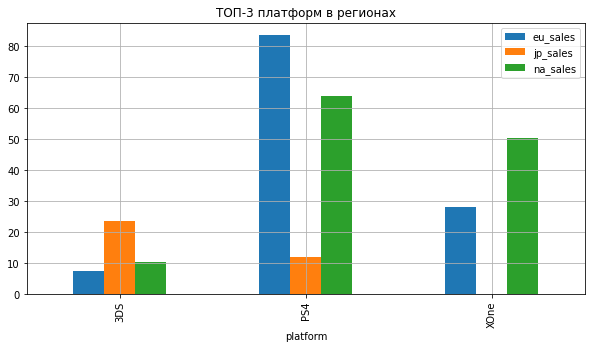

In [45]:
#определим самые популярные платформы в каждом регионе
(
    games.query('platform in @top_platform')
    .pivot_table(index='platform', values=('na_sales', 'eu_sales', 'jp_sales'), aggfunc='sum')
    .plot(kind='bar', title='ТОП-3 платформ в регионах', grid=True, figsize=(10, 5))
)

plt.show()

In [46]:
#определим долю продаж по платформам в NA
all_platform = games.query('platform in @top_platform').groupby('platform')['total_sales_game'].sum()
na_platform = games.query('platform in @top_platform').groupby('platform')['na_sales'].sum()
na_platform / all_platform * 100

platform
3DS     24.021435
PS4     33.941005
XOne    58.291807
dtype: float64

In [47]:
#определим долю продаж по платформам в EU
eu_platform = games.query('platform in @top_platform').groupby('platform')['eu_sales'].sum()
eu_platform / all_platform * 100

platform
3DS     17.218080
PS4     44.400744
XOne    32.564608
dtype: float64

In [48]:
#определим долю продаж по платформам в JP
jp_platform = games.query('platform in @top_platform').groupby('platform')['jp_sales'].sum()
jp_platform / all_platform * 100

platform
3DS     54.869525
PS4      6.404465
XOne     0.208599
dtype: float64

В Северной Америке продажи XOne составляют почти 60% от общего количества продаж XOne в мире, при этом по количеству продаж лидирует платформа PS4 (доля продаж в регионе 34%). Около 45% от общих продаж PS4 приходится на Европу, по количеству продаж эта платформа также имеет существенное преобладание. В Японии предпочтение отдают 3DS, на этот регион приходится более 50% всех продаж данной платформы.

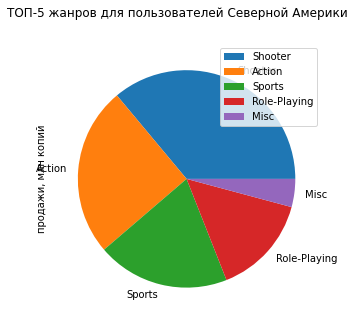

In [49]:
#определим самые популярные жанры для пользователей NA
(
    games.pivot_table(index='genre', values='na_sales', aggfunc='sum')
    .sort_values(('na_sales'), ascending=False)
    .head()
    .plot(kind='pie', subplots=True, title='ТОП-5 жанров для пользователей Северной Америки', figsize=(10, 5))
)
    
plt.ylabel('продажи, млн копий')
plt.show()

In [50]:
#определим долю продаж по жанрам в NA
all_genre = games.groupby('genre')['total_sales_game'].sum()
na_genre = games.groupby('genre')['na_sales'].sum()
display((na_genre / all_genre * 100).sort_values(ascending=False).head())

genre
Shooter     45.568902
Fighting    44.785772
Sports      40.898492
Platform    40.732759
Misc        39.378970
dtype: float64

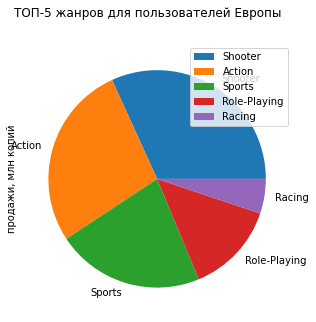

In [51]:
#определим самые популярные жанры для пользователей EU
(
    games.pivot_table(index='genre', values='eu_sales', aggfunc='sum')
    .sort_values(('eu_sales'), ascending=False)
    .head()
    .plot(kind='pie', subplots=True, title='ТОП-5 жанров для пользователей Европы', figsize=(10, 5))
)
    
plt.ylabel('продажи, млн копий')
plt.show()

In [52]:
#определим долю продаж по жанрам в EU
eu_genre = games.groupby('genre')['eu_sales'].sum()
display((eu_genre / all_genre * 100).sort_values(ascending=False).head())

genre
Racing        60.036832
Strategy      52.684564
Simulation    49.536424
Sports        43.245764
Adventure     38.981636
dtype: float64

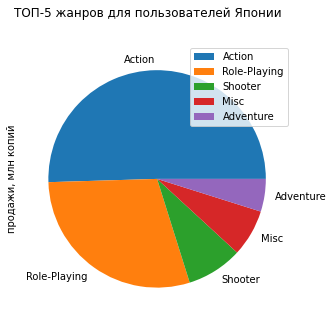

In [53]:
#определим самые популярные жанры для пользователей JP
(
    games.pivot_table(index='genre', values='jp_sales', aggfunc='sum')
    .sort_values(('jp_sales'), ascending=False)
    .head()
    .plot(kind='pie', subplots=True, title='ТОП-5 жанров для пользователей Японии', figsize=(10, 5))
)
    
plt.ylabel('продажи, млн копий')
plt.show()

In [54]:
#определим долю продаж по жанрам в JP
jp_genre = games.groupby('genre')['jp_sales'].sum()
display((jp_genre / all_genre * 100).sort_values(ascending=False).head())

genre
Puzzle          72.222222
Simulation      25.562914
Role-Playing    24.023647
Action          22.569274
Misc            22.512350
dtype: float64

Распределение жанров по количеству и долям продаж в различных регионах имеет существенное различие. Так в Северной Америке несмотря на небольшое количество проданных игр в жанре Fighting - это более 45% от мировых продаж, что позволяет сделать вывод о популярности этого жанра среди пользователей. Аналогичная ситуация в Европе с жанром Racing, на который приходится около 60% мировых продаж. В Японии продажи жанра Puzzle составляют более 70% от мировых продаж.

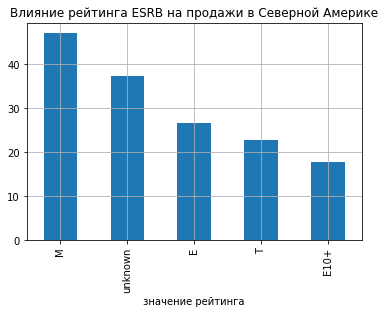

In [55]:
#посмотрим влияние рейтинга ESRB на продажи в NA
na_rating = games.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
na_rating.plot(kind='bar', title='Влияние рейтинга ESRB на продажи в Северной Америке', grid=True)
plt.xlabel('значение рейтинга')
plt.show()

В Северной Америке предпочтение отдают играм со значением рейтинга «M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет. 

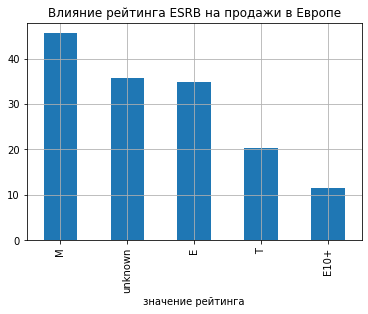

In [56]:
#посмотрим влияние рейтинга ESRB на продажи в EU
eu_rating = games.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
eu_rating.plot(kind='bar', title='Влияние рейтинга ESRB на продажи в Европе', grid=True)
plt.xlabel('значение рейтинга')
plt.show()

Аналогичная ситуация в Европе, предпочтение играм со значением рейтинга "M". Также выделяются игры со значением «E» («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов.

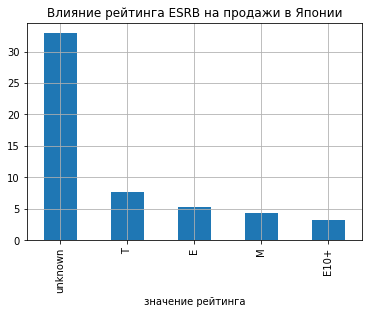

In [57]:
#посмотрим влияние рейтинга ESRB на продажи в JP
jp_rating = games.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)
jp_rating.plot(kind='bar', title='Влияние рейтинга ESRB на продажи в Японии', grid=True)
plt.xlabel('значение рейтинга')
plt.show()

В Японии популярны игры, возрастная категория по которым не определена. Далее по популярности игры с рейтингом «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет.

__Вывод__

Предпочтения по платформам в регионах (NA, EU, JP):
1. В Северной Америке продажи XOne составляют почти 60% от общего количества продаж XOne в мире, при этом по количеству продаж она уступает платформе PS4 (доля продаж в регионе 34%). 
2. Около 45% от общих продаж PS4 приходится на Европу, по количеству продаж эта платформа также имеет существенное преобладание в регионе. 
3. В Японии предпочтение отдают 3DS, на этот регион приходится более 50% всех продаж данной платформы.

Популярность жанров в регионах:

Распределение жанров по количеству и долям продаж в различных регионах имеет существенное различие. Так по количеству продаж лидируют жанры Action, Shooter и Role-Playing, а по долям продаж ситуация следующая:
1. В Северной Америке несмотря на небольшое количество проданных игр в жанре Fighting - это более 45% от мировых продаж, что позволяет сделать вывод о популярности этого жанра среди пользователей. 
2. Аналогичная ситуация в Европе с жанром Racing, на который приходится около 60% мировых продаж. 
3. В Японии продажи жанра Puzzle составляют более 70% от мировых продаж.

Прдпочтения игр по рейтингу ESRB распределились следующим образом:
1. В Северной Америке предпочтение отдают играм со значением рейтинга «M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет.
2. Аналогичная ситуация в Европе, предпочтение играм со значением рейтинга "M". Также выделяются игры со значением «E» («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов.
3. В Японии популярны игры, возрастная категория по которым не определена. Далее по популярности игры с рейтингом «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет.

### Проверка гипотез 

1. Проверим гипотезу о том, что оценки пользователей платформ Xbox One и PC одинаковые.

Нулевая гипотеза: средние значения пользовательских рейтингов равны.\
Альтернативная гипотеза: средние значения пользовательских рейтингов не равны.

In [58]:
#подготовим данные для выборки
games_xbox = games.loc[games['platform'] == 'XOne'].dropna(subset=['user_score']).reset_index(drop=True)
games_pc = games.loc[games['platform'] == 'PC'].dropna(subset=['user_score']).reset_index(drop=True)

In [59]:
#выбираем метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей 
alpha = 0.05 #уровень статистической значимости

results = st.ttest_ind(games_xbox['user_score'], games_pc['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.2778542084733835
Не получилось отвергнуть нулевую гипотезу


Средние значения оценок пользователей платформ Xbox One и РС равны.

2. Проверим гипотезу, что оценки пользователей жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Нулевая гипотеза: средние значения пользовательских рейтингов равны.\
Альтернативная гипотеза: средние значения пользовательских рейтингов не равны.

In [60]:
#подготовим данные для выборки
games_action = games.loc[games['genre'] == 'Action'].dropna(subset=['user_score']).reset_index(drop=True)
games_sports = games.loc[games['genre'] == 'Sports'].dropna(subset=['user_score']).reset_index(drop=True)

In [61]:
#выбираем метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей 
alpha = 0.05 #уровень статистической значимости

results = st.ttest_ind(games_action['user_score'], games_sports['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.0012846807938657e-13
Отвергаем нулевую гипотезу


Средние значения оценок пользователей жанров Action и Sports не равны.

### Общий вывод

В проекте были рассмотрены данные за период с 1980 по 2016 год о продажах компьютерных игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Проведен анализ и проверены гипотезы для выявления определяющих успешность игры закономерностей, ниже представлены выводы.

#### Выводы по предобработке данных

В процессе предобработки проведены следующие действия с данными:
1. Названия столбцов приведены к единому регистру.
2. Преобразованы типы данных в столбцах `year_of_release` и `user_score` на int и float соответственно.

Год выхода игры - целочисленное значение, поэтому замена на тип int. Пользовательский рейтинг - это дробные числа, поэтому замена на float, чтобы в дальнейшем иметь возможность обработать пропуски и проводить математические операции с данными.

3. Обработаны пропуски и неявные дубликаты:
* название игры и ее жанр являются одними из ключевых параметров продукта, заменить их на какое-либо значение не представляется возможным. Аналогичная ситуация с годом выхода, для дальнейшего проведения анализа необходимы конкретные данные по игре. Предложено удалить строки с пропусками в данных столбцах (удалено менее 2% от первоначального объема данных).
* значение 'tbd' в столбце `user_score` аналогично отсутствию рейтинга (присвоение рейтинга только планируется), заменено значением NaN.
* пропуски в столбцах `critic_score` и `user_score` оставляем, так как оценки критиков и пользователей являются субъективными параметрами, зависящими от критериев оценки и личных предпочтений пользователей. Замена может исказить данные и дальнейший анализ.
* рейтинг K-A(Kids to Adults) переименован ассоциацией ESRB в E(Everyone), поэтому проведена замена в столбце `rating` к единому значению, пропуски в столбце `rating` заполнены значением unknown.

Появление пропусков в данных может быть обусловлено человеческим фактором, когда данные были упущены и не введены в систему, а также отсутствием их на момент сбора информации (не определен жанр игры и дата выхода, не присвоены рейтинги и не получены отзывы) и несвоевременной актуализацией в дальнейшем.

4. Проведена проверка на наличие аномальных значений и дубликатов.
Исходя из числового описания данных можно сделать вывод об отсутствии выбивающихся значений в датасете. Строки-дубликаты в данных также отсутствуют. Неявные дубликаты с одинаковыми названиями, годами выпуска, платформой и жанром удалены.
5. Добавлен столбец `total_sales_game`, в котором посчитаны суммарные продажи во всех регионах по каждой игре.
#### Выводы по анализу данных

В датасете представлены данные с 1980 года. В период 1980-1995 годы игр выпускалось значительно меньше. Пик по выпуску игр приходится на 2008-2009 годы. Последние годы наблюдается спад.\
В период 2011-2013 годы новые платформы появлялись ежегодно. При выходе новой платформы интерес к предыдущей версии резко снижался. Старые платформы уходят с рынка постепенно. В последние два года продажи по большинству платформ приблизились к 0, за исключением трех - PS4, XOne и 3DS.\
Для дальнейшего анализа были выбраны данные за период 2015-2016 и по наиболее перспективным платформам - PS4, XOne и 3DS:
* на графике «ящик с усами» по глобальным продажам игр в разбивке по платформам видно, что платформы имеют схожие значения медиан продаж, но в целом, учитывая размер коробки и квартили, показатели продаж по платформе XOne выше. При этом по платформе PS4 выбросов значительно больше, чем по другим платформам, что может означать, что на эту платформу приходится больше бестселлеров.
* коэффициент корелляции показывает отсутствие зависимости продаж от отзывов пользователей и слабую зависимость от отзывов критиков, при этом на графиках видно, что преобладают высокие оценки и наблюдается рост продаж при оценках выше среднего. Оценки по платформе 3DS слабее по сравнению с другими платформами, что отражается и на продажах.
* жанр Action является явным лидером по количеству выпущенных игр.
* самыми продаваемыми являются игры в жанре Shooter. Также в лидерах по продажам с заметным преимуществом относительно других жанров находятся игры в жанрах Action, Sports и Role-Playing, все 4 жанра находятся в топе и по выпуску игр. По показателю проданных копий одной игры также лидирует жанр Shooter, при этом жанр Action набирает объем продаж за счет бестселлеров.
#### Выводы по составлению портрета пользователя

Предпочтения по платформам в регионах (NA, EU, JP):
1. В Северной Америке продажи XOne составляют почти 60% от общего количества продаж XOne в мире, при этом по количеству продаж она уступает платформе PS4 (доля продаж в регионе 34%). 
2. Около 45% от общих продаж PS4 приходится на Европу, по количеству продаж эта платформа также имеет существенное преобладание в регионе. 
3. В Японии предпочтение отдают 3DS, на этот регион приходится более 50% всех продаж данной платформы.

Популярность жанров в регионах:

Распределение жанров по количеству и долям продаж в различных регионах имеет существенное различие. Так по количеству продаж лидируют жанры Action, Shooter и Role-Playing, а по долям продаж ситуация следующая:
1. В Северной Америке несмотря на небольшое количество проданных игр в жанре Fighting - это более 45% от мировых продаж, что позволяет сделать вывод о популярности этого жанра среди пользователей. 
2. Аналогичная ситуация в Европе с жанром Racing, на который приходится около 60% мировых продаж. 
3. В Японии продажи жанра Puzzle составляют более 70% от мировых продаж.

Прдпочтения игр по рейтингу ESRB распределились следующим образом:
1. В Северной Америке предпочтение отдают играм со значением рейтинга «M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет.
2. Аналогичная ситуация в Европе, предпочтение играм со значением рейтинга "M". Также выделяются игры со значением «E» («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов.
3. В Японии популярны игры, возрастная категория по которым не определена. Далее по популярности игры с рейтингом «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет.
#### Выводы по проверке гипотез

По итогам проверки гипотез данные о продажах за период 2015-2016 гг. дают достаточно оснований для следующих выводов:
1. Средние значения оценок пользователей платформ Xbox One и РС равны;
2. Средние значения оценок пользователей жанров Action и Sports не равны.